## Initial EDA for death rate csv 

First we are just importing the neccessary libraries 

In [18]:
import numpy as np
import pandas as pd
import csv 

First we want to read in the data and do some possible data cleaning before doing any analysis and such. The analysis will also shed insight to any irregularities in the data. 

In [19]:
#Just reading in the data
death_rate_data = pd.read_csv("deathrate.csv")

#This is dropping that first row.. 
death_rate_data = death_rate_data.iloc[:, 1:]

#Seeing the first five columns of the data 
print(death_rate_data.head())

#This is printing the dimensions of the data 
print(death_rate_data.shape)

   Year                County   FIPS  Deathrate  Population  Poverty
0  1999  Abbeville County, SC  45001          1       25921   3257.0
1  1999     Acadia Parish, LA  22001          7       58762  12461.0
2  1999   Accomack County, VA  51001          5       37614   6107.0
3  1999        Ada County, ID  16001          7      294292  24964.0
4  1999      Adair County, IA  19001          1        8298    697.0
(50164, 6)


Year           0
County         0
FIPS           0
Deathrate      0
Population     0
Poverty       11
dtype: int64

In [21]:
#checking to see if there are any missing values in the data 

death_rate_data.isnull().sum()

Year           0
County         0
FIPS           0
Deathrate      0
Population     0
Poverty       11
dtype: int64

We see that there are only 11 missing values .. in the poverty column ... that is pretty good ?! 
This will have to be dealt with if we do analysis with the poverty data...


We now look at the different types of data that we are working with ... this is useful so we can keep track for when doing different analysis. 

In [23]:
print(death_rate_data.dtypes)

Year            int64
County         object
FIPS            int64
Deathrate       int64
Population      int64
Poverty       float64
dtype: object


Making a correlation matrix ... 

In [26]:
correlations = death_rate_data.corr(method = 'pearson')
print(correlations)

                Year      FIPS  Deathrate  Population   Poverty
Year        1.000000  0.000133   0.559916    0.012588  0.038598
FIPS        0.000133  1.000000   0.001941   -0.057785 -0.053475
Deathrate   0.559916  0.001941   1.000000    0.094421  0.108382
Population  0.012588 -0.057785   0.094421    1.000000  0.959185
Poverty     0.038598 -0.053475   0.108382    0.959185  1.000000


Also it is important to check for skewness in the data... Data may be shifted to the left or right and before you do any sort of analysis you will want to check for this.... 

In [27]:
print(death_rate_data.skew())
# A value that is near zero has less of a skew otherwise 
#with a positive or negative value it has more of a skew or not 

Year           0.000117
FIPS          -0.078924
Deathrate      0.607581
Population    14.770130
Poverty       18.120147
dtype: float64


we see a skew with both poverty and population ... hmmm

Next we are just going to graph each individual varaible.... ? 

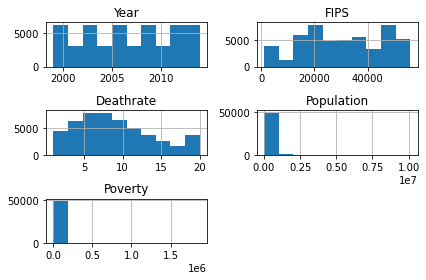

In [31]:
from matplotlib import pyplot 

death_rate_data.hist()
pyplot.tight_layout()
pyplot.show()



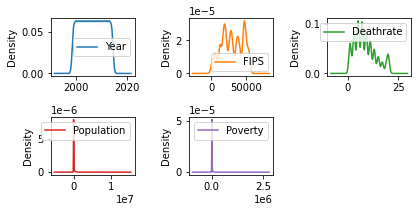

In [34]:
death_rate_data.plot(kind = 'density', subplots = True, layout=(3,3), sharex=False)
pyplot.tight_layout()
pyplot.show()

Trying out some density plots .... hmm interesting isnt it 

Seeing if there are any outliers with boxplots I suppose? 

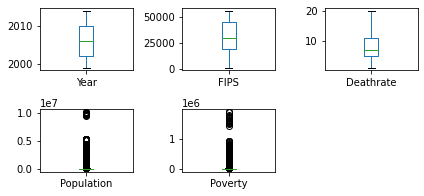

In [36]:
death_rate_data.plot(kind = 'box', subplots = True, layout=(3,3), sharex=False, sharey = False)
pyplot.tight_layout()
pyplot.show()

Want to do a barplot by County... that would be intersting okay doing that in the following line LOL dont do the below there is a gazillion different counties haha ... okay nvm 

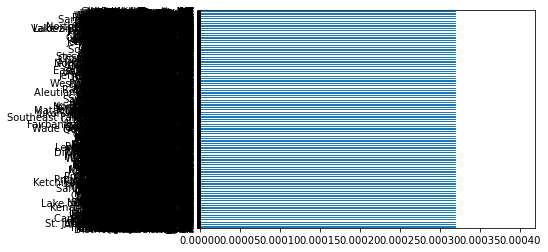

In [37]:
# Let's calculate the percentage of each County status category.
#death_rate_data.County.value_counts(normalize=True)

#plot the bar graph of percentage County categories
#death_rate_data.County.value_counts(normalize=True).plot.barh()
#pyplot.show()

We can try plotting different variables against each other to see if there is some sort of relationship? 
Maybe an interesting one would be doing poverty vs. deaths ... This could be a relationship what we may explore further in the future too. 

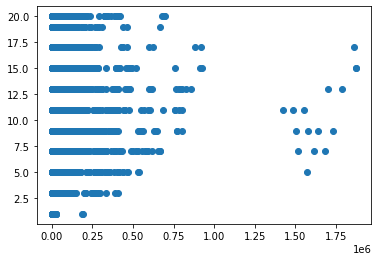

In [39]:
pyplot.scatter(death_rate_data.Poverty,death_rate_data.Deathrate)
pyplot.show()


## TRYING new data set stuff 

In [9]:
import pandas as pd
import numpy as np 

import os

need_to_clean = '/Users/meera/Documents/drugs/Data/age_ethinicity_data.csv'

data = pd.read_csv(need_to_clean)

data = data[['SUMLEV', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE',
             'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE',
             'TOM_FEMALE', 'NH_MALE', 'NH_FEMALE', 'H_MALE', 'H_FEMALE']]

data['YEAR'] = data['YEAR'].replace([3], 2010.0)
data['YEAR'] = data['YEAR'].replace([4], 2011.0)
data['YEAR'] = data['YEAR'].replace([5], 2012.0)
data['YEAR'] = data['YEAR'].replace([6], 2013.0)
data['YEAR'] = data['YEAR'].replace([7], 2014.0)
data['YEAR'] = data['YEAR'].replace([8], 2015.0)
data['YEAR'] = data['YEAR'].replace([9], 2016.0)
data['YEAR'] = data['YEAR'].replace([10], 2017.0)
data['YEAR'] = data['YEAR'].replace([11], 2018.0)
data['YEAR'] = data['YEAR'].replace([12], 2019.0)


#now we want to drop the rows that hav year == 2 or year == 4 
#this is because these columns correspond to an estimated population that is in 2010 ... 

data = data[data.YEAR != 2]
data = data[data.YEAR != 1]


#Changing some of the column names 
data = data.rename(columns={'STNAME': 'State', 'CTYNAME': 'County', 'YEAR': 'Year'})

#This shows that Baldwin County exists 
#data[(data.County == "Baldwin County")]

data.to_csv("ethnicity_age.csv", index=False)

#do a rigth join yes on both Year and County but what do we do with the AGEGRP ???!?! 

In [2]:
#This is Rhiann's data set 
overall_data = pd.read_csv("/Users/meera/Documents/drugs/Data/od_deaths.csv")

overall_data.head()

overall_data.drop(columns = overall_data.columns[0])

,Year,State,State Code,County,County Code,Deaths,Population,Crude Rate,Cruder Rate,Deathrate per 100
0,1999.0,Alabama,1.0,Baldwin County,1003.0,11.0,137555.0,Unreliable,7.996801,0.007997
1,1999.0,Alabama,1.0,Jefferson County,1073.0,34.0,662845.0,5.13,5.129404,0.005129
2,1999.0,Alabama,1.0,Madison County,1089.0,10.0,274693.0,Unreliable,3.640428,0.003640
3,1999.0,Alabama,1.0,Mobile County,1097.0,28.0,399323.0,7.01,7.011868,0.007012
4,1999.0,Alaska,2.0,Anchorage Borough,2020.0,21.0,259348.0,8.10,8.097228,0.008097
...,...,...,...,...,...,...,...,...,...,...
15891,2020.0,Wisconsin,55.0,Winnebago County,55139.0,38.0,171631.0,22.14,22.140522,0.022141
15892,2020.0,Wisconsin,55.0,Wood County,55141.0,18.0,72560.0,Unreliable,24.807056,0.024807
15893,2020.0,Wyoming,56.0,Laramie County,56021.0,17.0,100595.0,Unreliable,16.899448,0.016899
15894,2020.0,Wyoming,56.0,Natrona County,56025.0,16.0,80815.0,Unreliable,19.798305,0.019798
